# 5.1 최적화 기초

### 최적화 문제

함수 f의 값을 최대화 혹은 최소화하는 변수 x값 x* (**해**)를 찾는 것.

x* = arg max_x f(x) or x* = arg min_x f(x)

**목적함수(J), 비용함수(C), 손실함수(L), 오차함수(E)**

**2차원 로젠브록 함수**

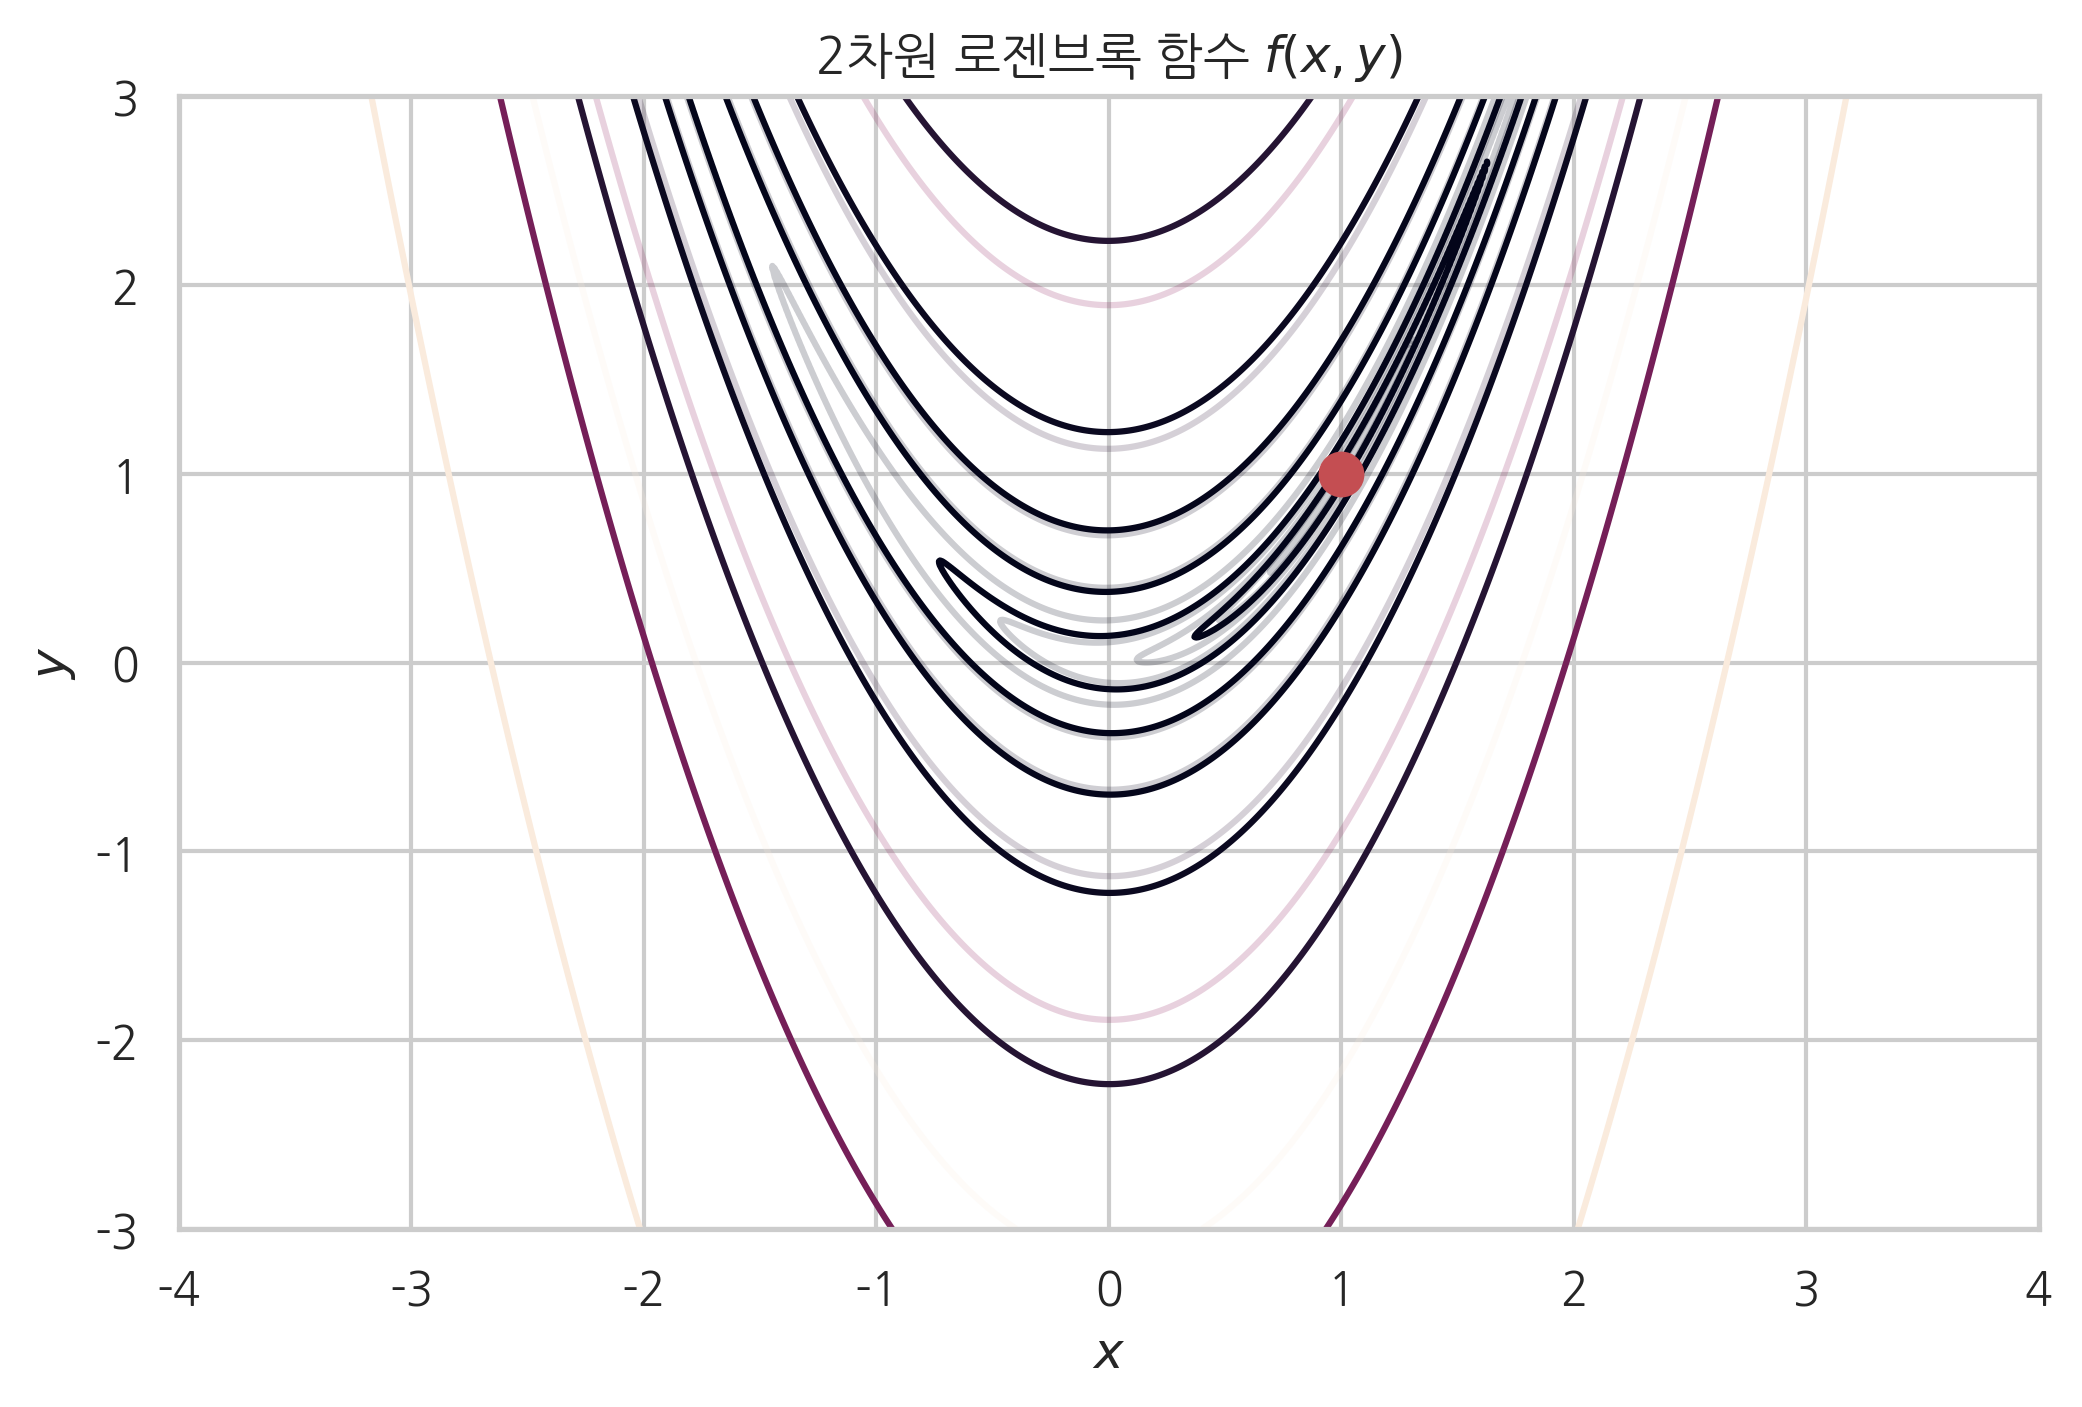

In [2]:
def f2(x,y):
    return (1-x)**2 + 100.0 * (y - x**2)**2

xx = np.linspace(-4, 4, 800)
yy = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels = np.logspace(-1, 3, 10)
plt.contour(X,Y,Z,alpha=0.2,levels=levels)
plt.contour(X,Y,Z,clolors='gray',levels=[0.4,3,15,50,150,500,1500,5000])
plt.plot(1, 1, 'ro', markersize=10)

plt.xlim(-4,4)
plt.ylim(-3,3)
plt.xticks(np.linspace(-4, 4,9))
plt.yticks(np.linspace(-3, 3, 7))
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('2차원 로젠브록 함수 $f(x,y)$')
plt.show()

### 그리드 서치와 수치적 최적화

**그리드서치**: 가능한 x값을 여러 개 넣어보고 그 중 가장 작은 값 선택

**수치적최적화**: 반복적 시행 착오에 의해 최적화 필요조건을 만족하는 값 x*를 찾는 방법

1. 현재 위치 x_k가 최적점인지 판단하는 알고리즘
2. 어떤 위치 x_k를 시도한 뒤, 다음 번에 시도할 위치 x_k+1를 찾는 알고리즘

### 기울기 필요조건

df / dx = 0 or ∇f = g = 0

이 때 2차 도함수가 양수면 최소점, 음수면 최대점

#### 최대경사법

현재 위치 x_k에서의 기울기 g(x_k)만을 이용해 다음 위치 x_k+1 결정

x_k+1 = x_k - μ∇f(x_k) = x_k - μg(x_k)

*μ: 스텝 사이즈

#### 2차원 로젠브록 함수에 대한 최대경사법 예제

In [4]:
def f2g(x, y):
    """f2(x, y)의 도함수"""
    return np.array((2.0 * (x - 1) - 400.0 * x * (y - x**2), 200.0 * (y - x**2)))

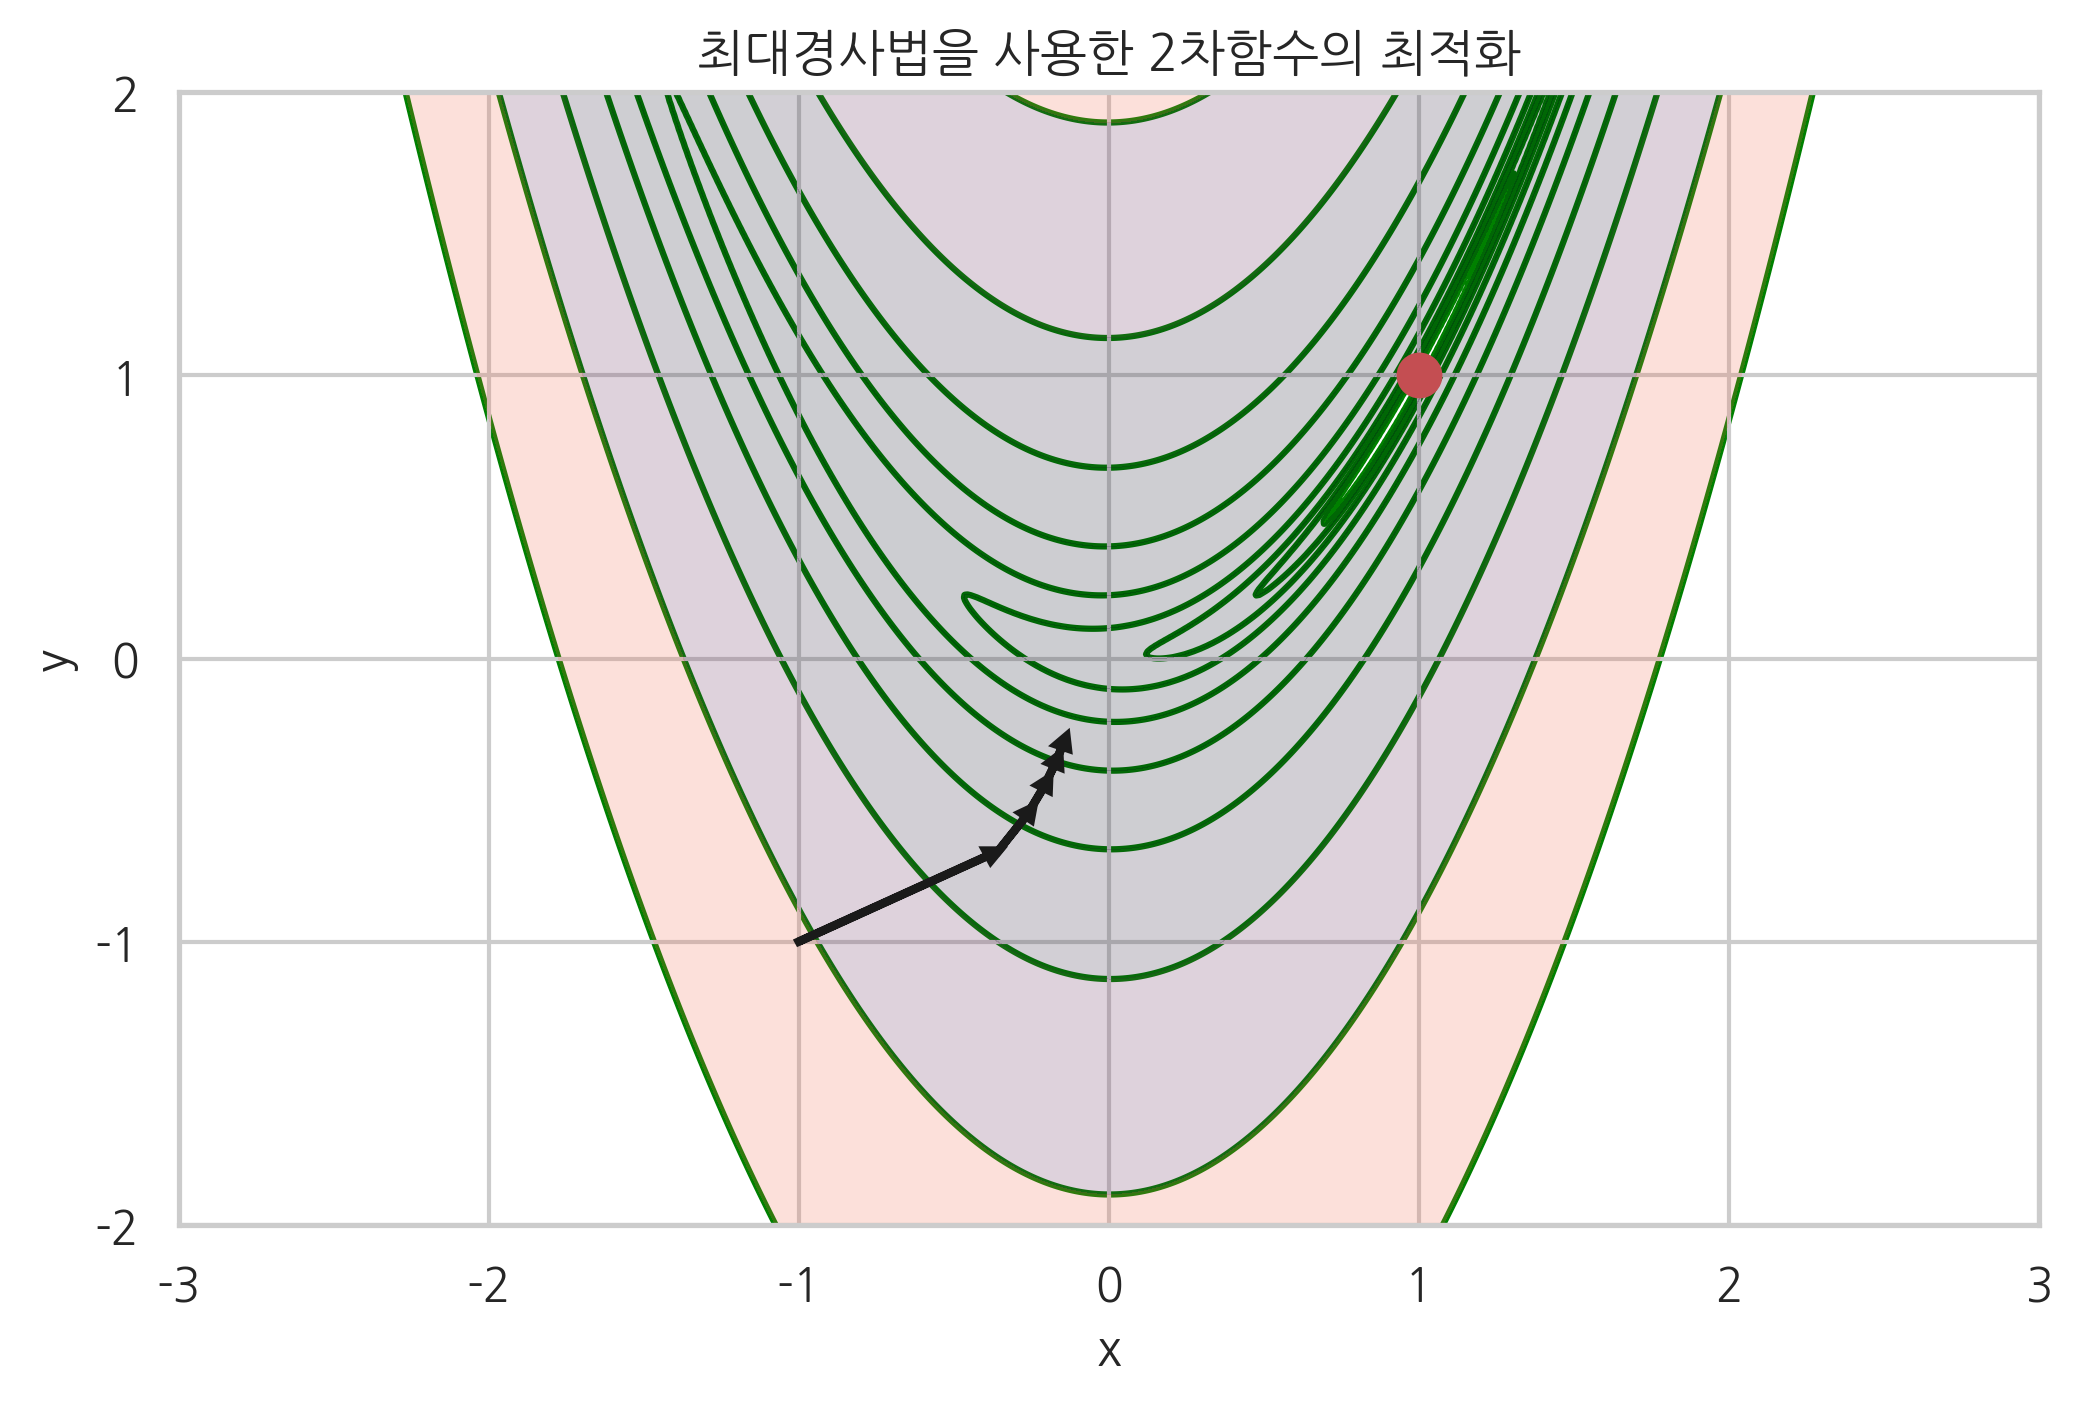

In [5]:
xx = np.linspace(-4, 4, 800)
yy = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels = np.logspace(-1, 3, 10)

plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
plt.contour(X, Y, Z, colors="green", levels=levels, zorder=0)
plt.plot(1, 1, 'ro', markersize=10)

mu = 8e-4  # step size
s = 0.95  # for arrowhead drawing

x, y = -1, -1
for i in range(5):
    g = f2g(x, y)
    plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1],
              head_width=0.04, head_length=0.04, fc='k', ec='k', lw=2)
    x = x - mu * g[0]
    y = y - mu * g[1]

plt.xlim(-3, 3)
plt.ylim(-2, 2)
plt.xticks(np.linspace(-3, 3, 7))
plt.yticks(np.linspace(-2, 2, 5))
plt.xlabel("x")
plt.ylabel("y")
plt.title("최대경사법을 사용한 2차함수의 최적화")
plt.show()

**진동 현상**: 곡면의 모양이 계곡과 같이 생긴 경우, 즉 그레디언트 벡터가 최적점을 가리키고 있지 않은 경우 발생

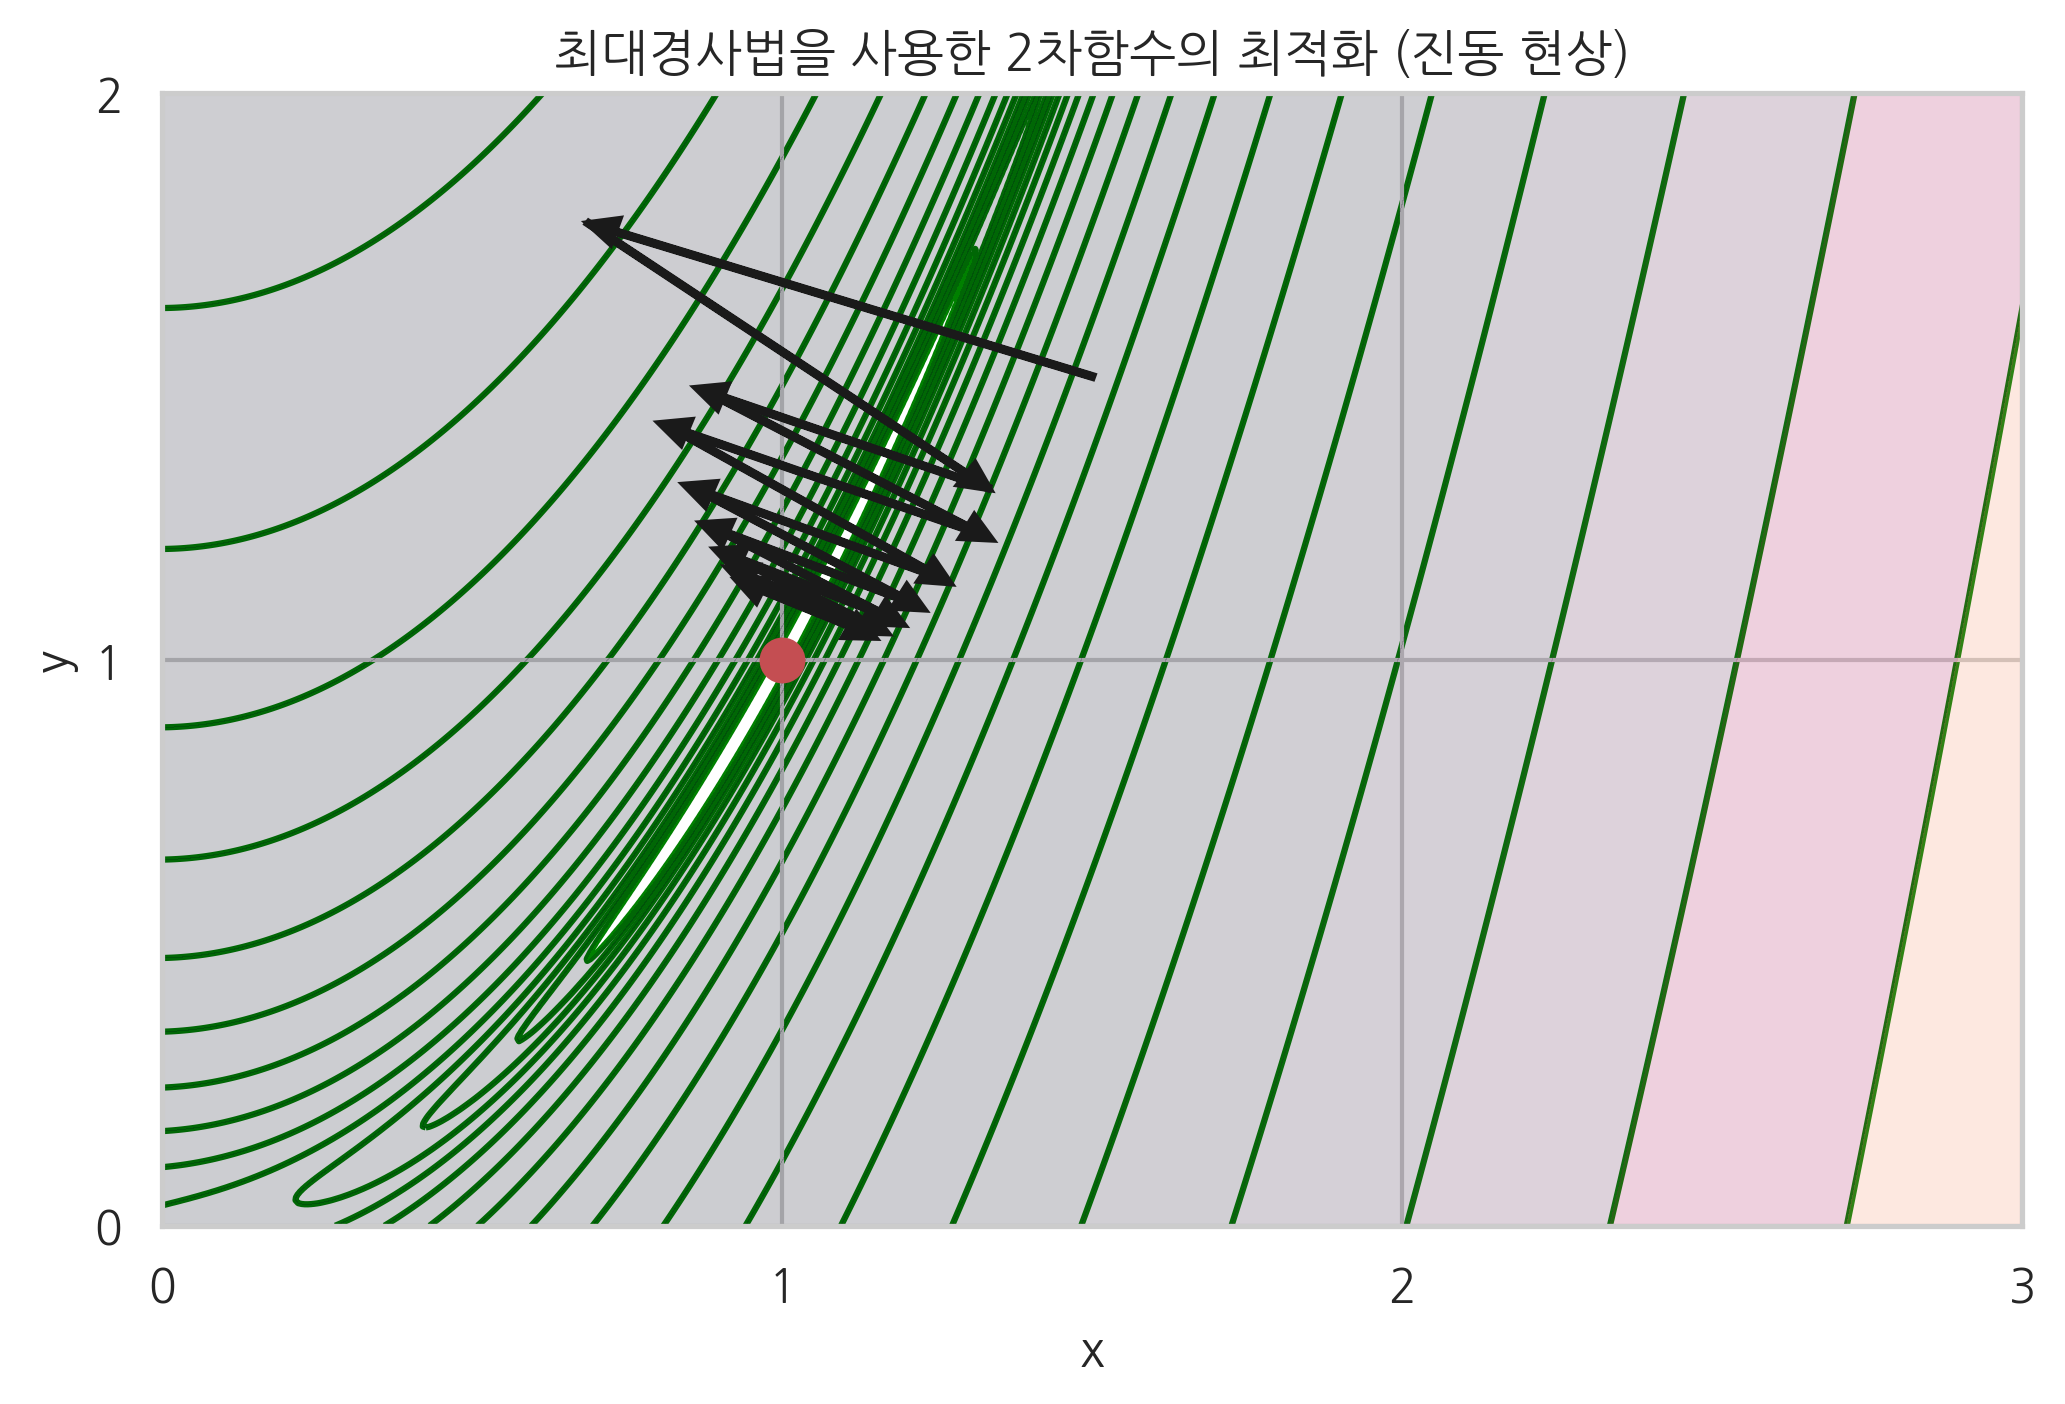

In [6]:
xx = np.linspace(0, 4, 800)
yy = np.linspace(0, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels = np.logspace(-1, 4, 20)

plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
plt.contour(X, Y, Z, colors="green", levels=levels, zorder=0)
plt.plot(1, 1, 'ro', markersize=10)

mu = 1.8e-3  # 스텝 사이즈
s = 0.95  # 화살표 크기

x, y = 1.5, 1.5
for i in range(15):
    g = f2g(x, y)
    plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1],
              head_width=0.04, head_length=0.04, fc='k', ec='k', lw=2)
    x = x - mu * g[0]
    y = y - mu * g[1]

plt.xlim(0, 3)
plt.ylim(0, 2)
plt.xticks(np.linspace(0, 3, 4))
plt.yticks(np.linspace(0, 2, 3))
plt.xlabel("x")
plt.ylabel("y")
plt.title("최대경사법을 사용한 2차함수의 최적화 (진동 현상)")
plt.show()

진동 현상을 없애는 방법

1. 헤시안 행렬 사용
2. 모멘텀 방법: 진행 방향으로 계속 진행하도록 모멘텀 추가

### 2차 도함수를 이용한 뉴턴 방법

그레디언트 벡터에 헤시안 행렬의 역행렬을 곱해서 방향과 거리가 변형된 그레디언트 벡터를 사용

**x_n+1 = xn - [Hf(x_n)]-1 @ ∇f(x_n)**

스텝 사이즈 불필요, 목적함수가 실제로 2차함수와 비슷한 모양이면 빨리 수렴 

단변수함수 뉴턴 방법: x_n+1 = x_n - f'(x_n) / f''(x_n)

즉, 최적의 스텝 사이즈는 1 / f''(x_n)

### 준 뉴턴 방법

사람이 구한 헤시안 행렬 함수를 사용하는 대신 현재 시도하고 있는 x_n 주변의 몇몇 점에서 함수의 값을 구하고 이를 이용하여

2차 도함수의 근삿값 혹은 이에 상응하는 정보를 수치적으로 계산

**BFGS방법**, **CG방법**

### 사이파이를 이용한 최적화

**optimize** 서브패키지의 **minimize()**

디폴트 = BFGS

result = minimize(func, x0, jac = jac)
* func: 목적함수
* x0: 초깃값 벡터
* jac: (옵션) 그레디언트 벡터를 출력하는 함수    

**minimize** 명령의 결과는 **OptimizeResult** 클래스 객채로 다음 속성을 가짐.

* x: 최적화 해
* success: 최적화에 성공시 True 반환
* message: 메시지 문자열
* fun : x 위치에서의 함숫값
* jac: x 위치에서 자코비안(그레디언트) 벡터의 값
* hess_inv: x 위치에서 헤시안 행렬의 역행렬 값
* nfev: 목적함수 호출 횟수
* njev: 자코비안 계산 횟수
* nhev: 헤시안 계산 횟수
* nit: x 이동 횟수

#### 예제

In [8]:
def f1(x):
    return (x - 2) ** 2 + 2

x0 = 0 
result = sp.optimize.minimize(f1, x0)
print(result)                

      fun: 2.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([1.99999999])


In [9]:
def f1p(x):
    return 2 * (x - 2)

result = sp.optimize.minimize(f1, x0, jac = f1p)
print(result)                

      fun: 2.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.])


In [10]:
def f2(x):
    return (1 - x[0])**2 + (x[1] - x[0]**2)**2

x0 = (-2, 2)
result = sp.optimize.minimize(f2, x0)
print(result)                

      fun: 1.8848804945082314e-12
 hess_inv: array([[0.50198922, 0.99805082],
       [0.99805082, 2.48776281]])
      jac: array([ 4.81483150e-06, -2.66166316e-06])
  message: 'Optimization terminated successfully.'
     nfev: 45
      nit: 12
     njev: 15
   status: 0
  success: True
        x: array([0.99999969, 0.99999805])


### 연습문제 5.1.1

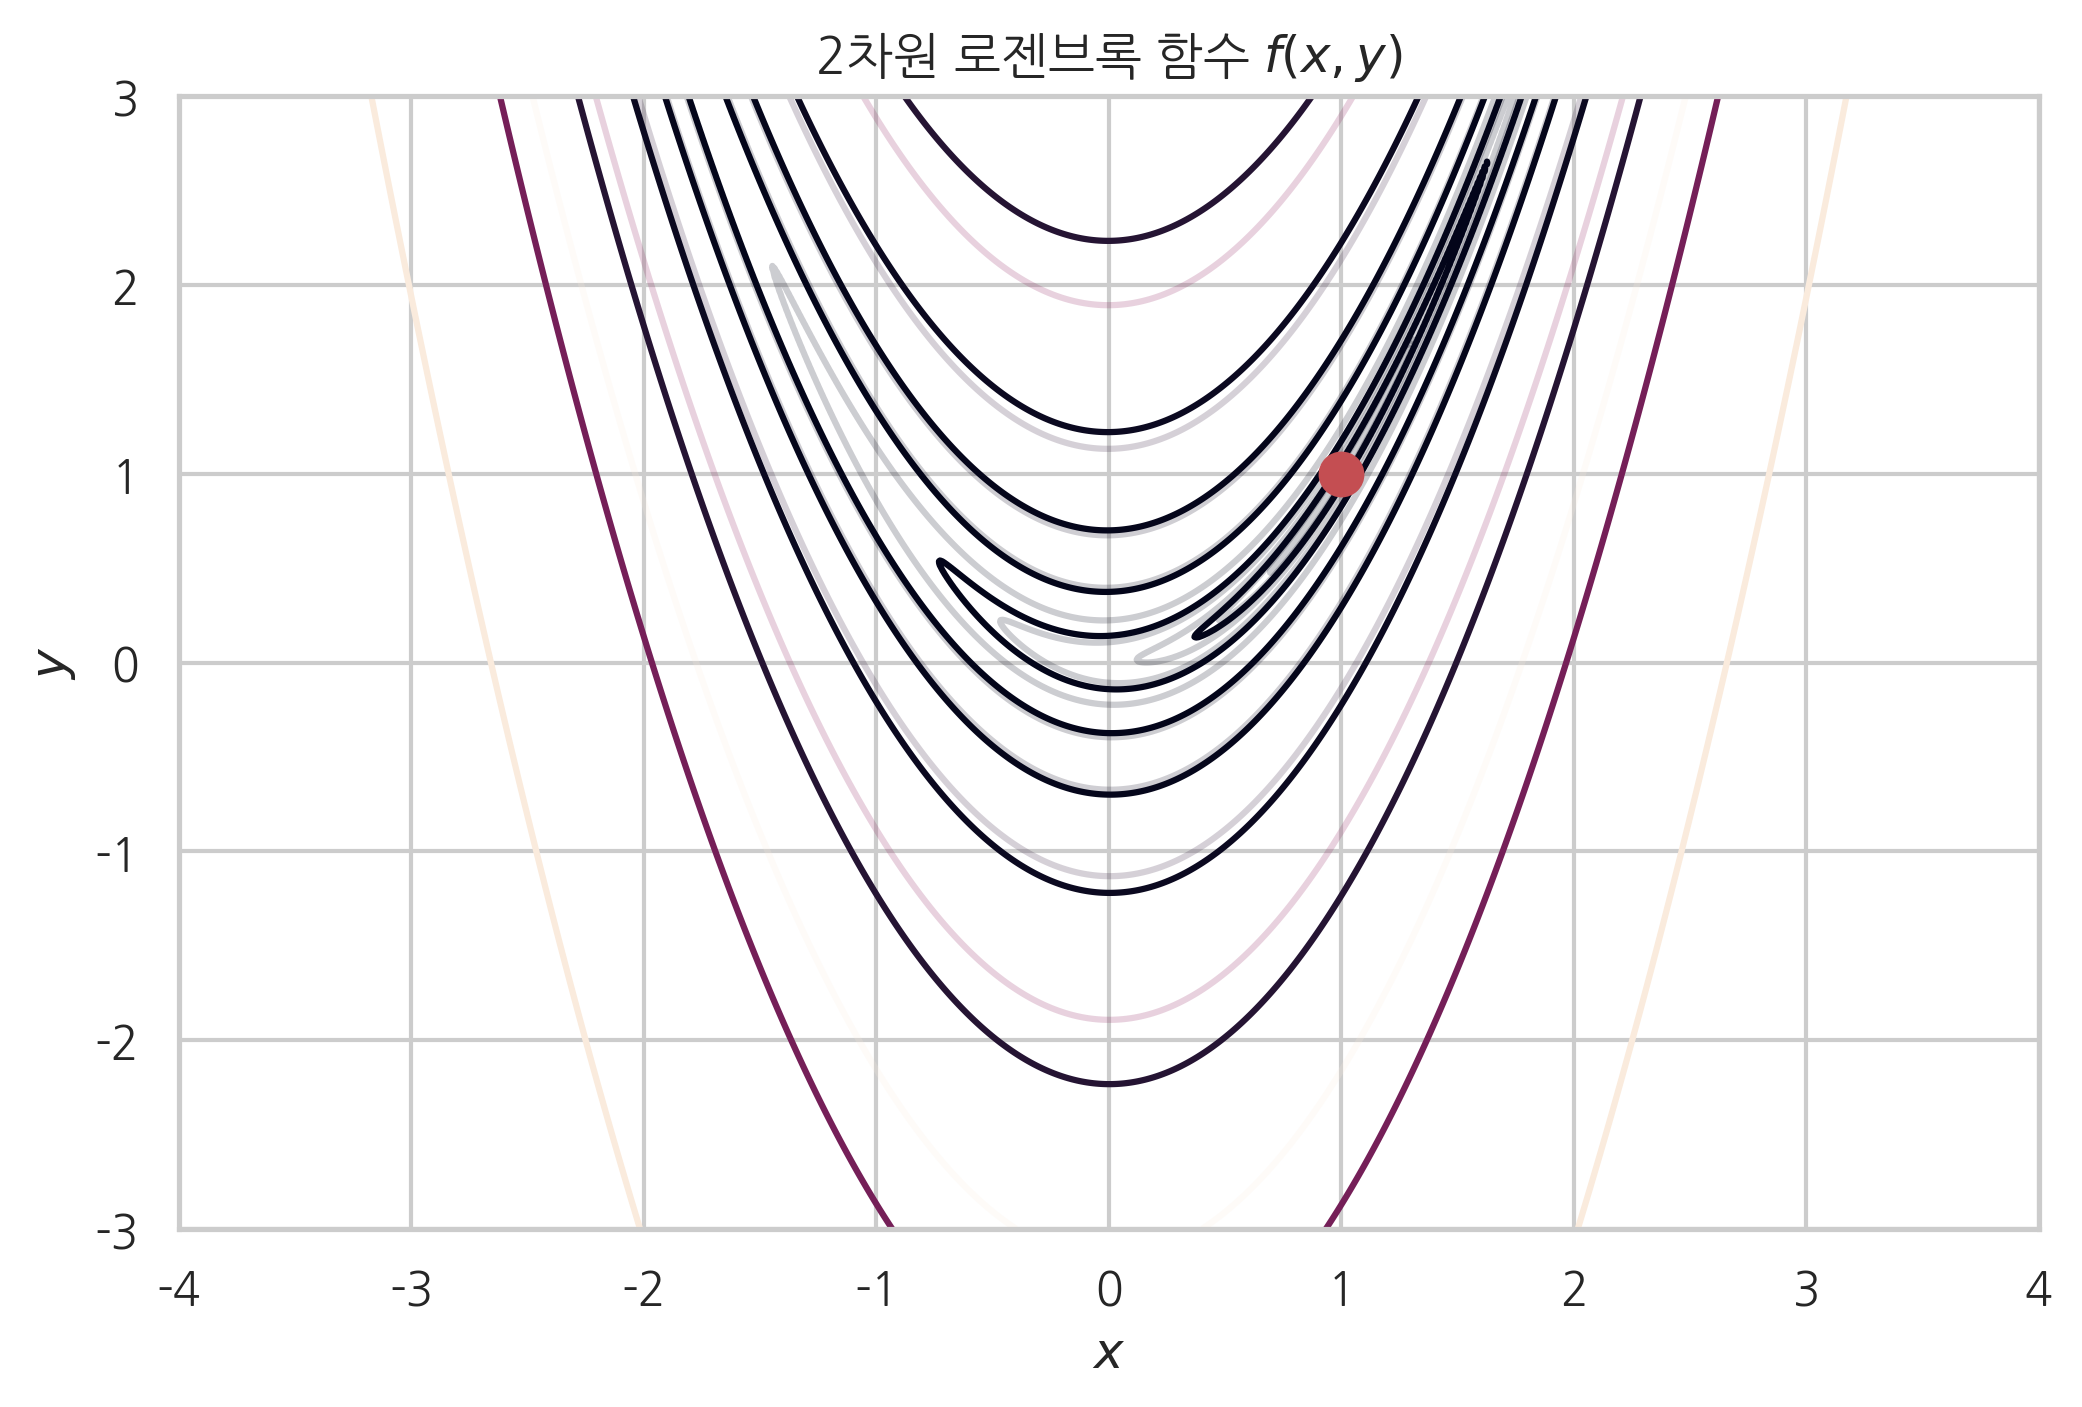

In [14]:
def f2(x,y):
    return (1-x)**2 + 100.0 * (y - x**2)**2

xx = np.linspace(-4, 4, 800)
yy = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels = np.logspace(-1, 3, 10)
plt.contour(X,Y,Z,alpha=0.2,levels=levels)
plt.contour(X,Y,Z,clolors='gray',levels=[0.4,3,15,50,150,500,1500,5000])
plt.plot(1, 1, 'ro', markersize=10)

plt.xlim(-4,4)
plt.ylim(-3,3)
plt.xticks(np.linspace(-4, 4,9))
plt.yticks(np.linspace(-3, 3, 7))
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('2차원 로젠브록 함수 $f(x,y)$')
plt.show()

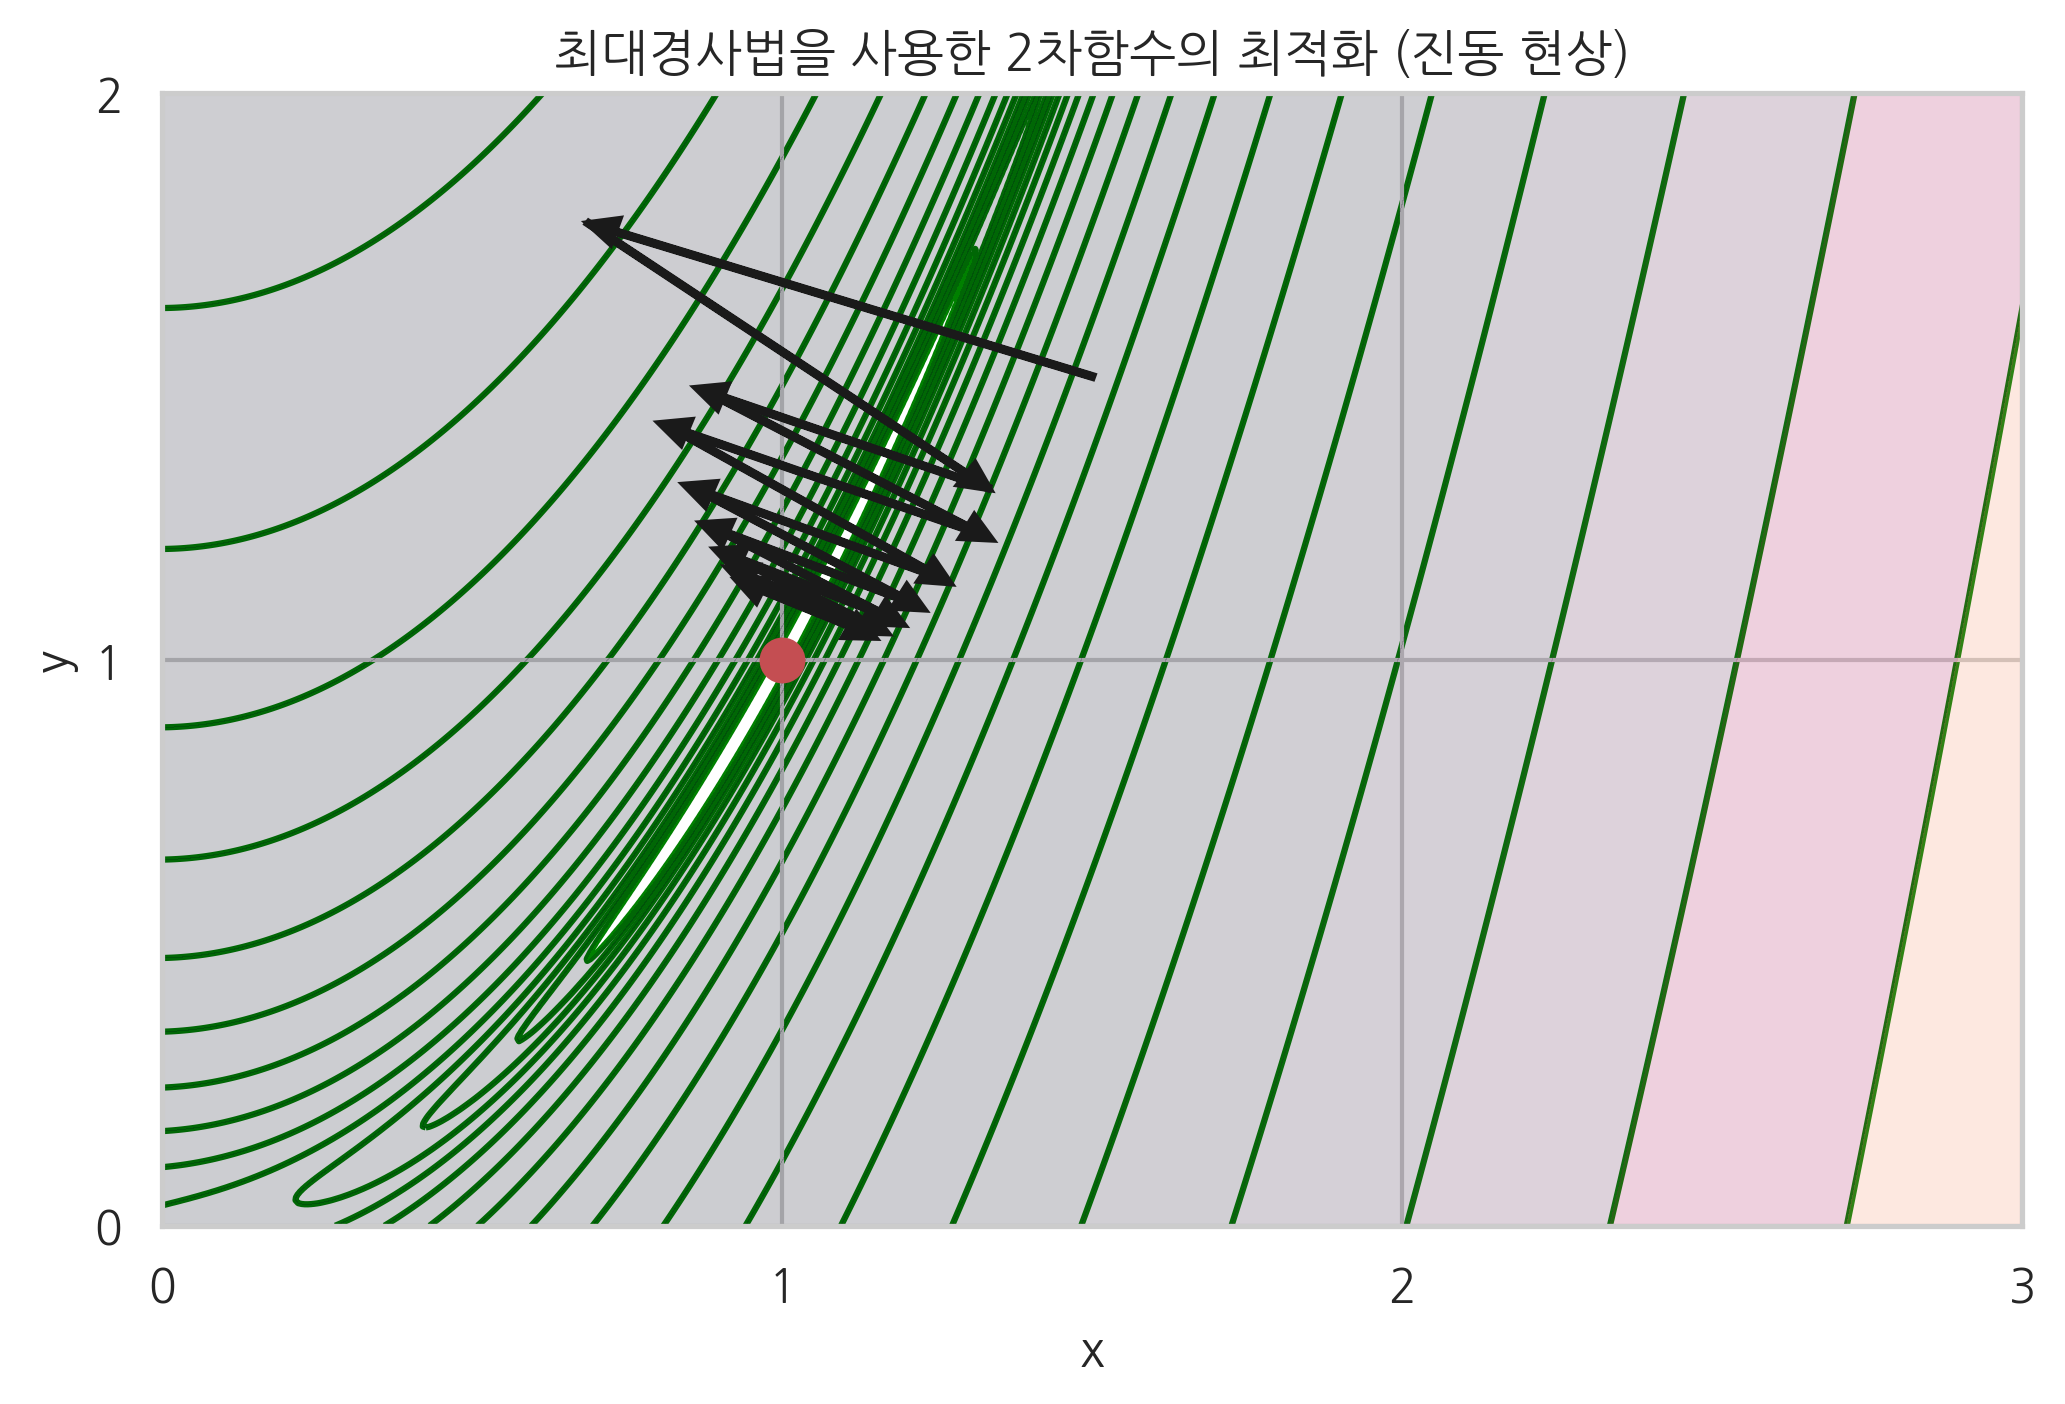

In [15]:
xx = np.linspace(0, 4, 800)
yy = np.linspace(0, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels = np.logspace(-1, 4, 20)

plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
plt.contour(X, Y, Z, colors="green", levels=levels, zorder=0)
plt.plot(1, 1, 'ro', markersize=10)

mu = 1.8e-3  # 스텝 사이즈
s = 0.95  # 화살표 크기

x, y = 1.5, 1.5
for i in range(15):
    g = f2g(x, y)
    plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1],
              head_width=0.04, head_length=0.04, fc='k', ec='k', lw=2)
    x = x - mu * g[0]
    y = y - mu * g[1]

plt.xlim(0, 3)
plt.ylim(0, 2)
plt.xticks(np.linspace(0, 3, 4))
plt.yticks(np.linspace(0, 2, 3))
plt.xlabel("x")
plt.ylabel("y")
plt.title("최대경사법을 사용한 2차함수의 최적화 (진동 현상)")
plt.show()

In [18]:
def f2(x):
    return (1-x[0])**2 + 100.0 * (x[1] - x[0]**2)**2

In [19]:
x0 = (1.5, 1.5)
result = sp.optimize.minimize(f2, x0)
print(result)                

      fun: 9.123793164028715e-12
 hess_inv: array([[0.49962018, 0.99918955],
       [0.99918955, 2.00326447]])
      jac: array([ 2.55840775e-05, -1.12667429e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 108
      nit: 15
     njev: 32
   status: 2
  success: False
        x: array([0.99999705, 0.99999403])


In [20]:
x0 = (0.5 , 1)
result = sp.optimize.minimize(f2, x0)
print(result)                

      fun: 2.008774459782242e-11
 hess_inv: array([[0.49932146, 0.99883678],
       [0.99883678, 2.00298768]])
      jac: array([-4.88271742e-07,  2.40402787e-07])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 15
     njev: 20
   status: 0
  success: True
        x: array([0.99999552, 0.99999103])


In [26]:
import sympy
x, y = sympy.symbols('x y')

In [27]:
f = (1-x)**2 + 100.0 * (y - x**2)**2

In [28]:
sympy.simplify(sympy.diff(f,x)), sympy.simplify(sympy.diff(f,y))

(400.0*x*(x**2 - y) + 2*x - 2, -200.0*x**2 + 200.0*y)

In [29]:
def f2p(x):
    return (400.0*x[0]*(x[0]**2 - x[1]) + 2*x[0] - 2, -200.0*x[0]**2 + 200.0*x[1])  

In [30]:
x0 = (0.5 , 1)
result = sp.optimize.minimize(f2, x0, jac = f2p)
print(result)      

      fun: 1.5440285302497646e-16
 hess_inv: array([[0.49933169, 0.9988604 ],
       [0.9988604 , 2.00304147]])
      jac: array([-4.82156957e-07,  2.37404095e-07])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 15
     njev: 20
   status: 0
  success: True
        x: array([1.        , 0.99999999])


### 전역 최적화 문제

**최적화하려는 함수가 복수의 국소 최적점을 가지고 있는 경우 수치적 최적화 방법으로 전역 최적점에 도달한다는 보장이 없음**

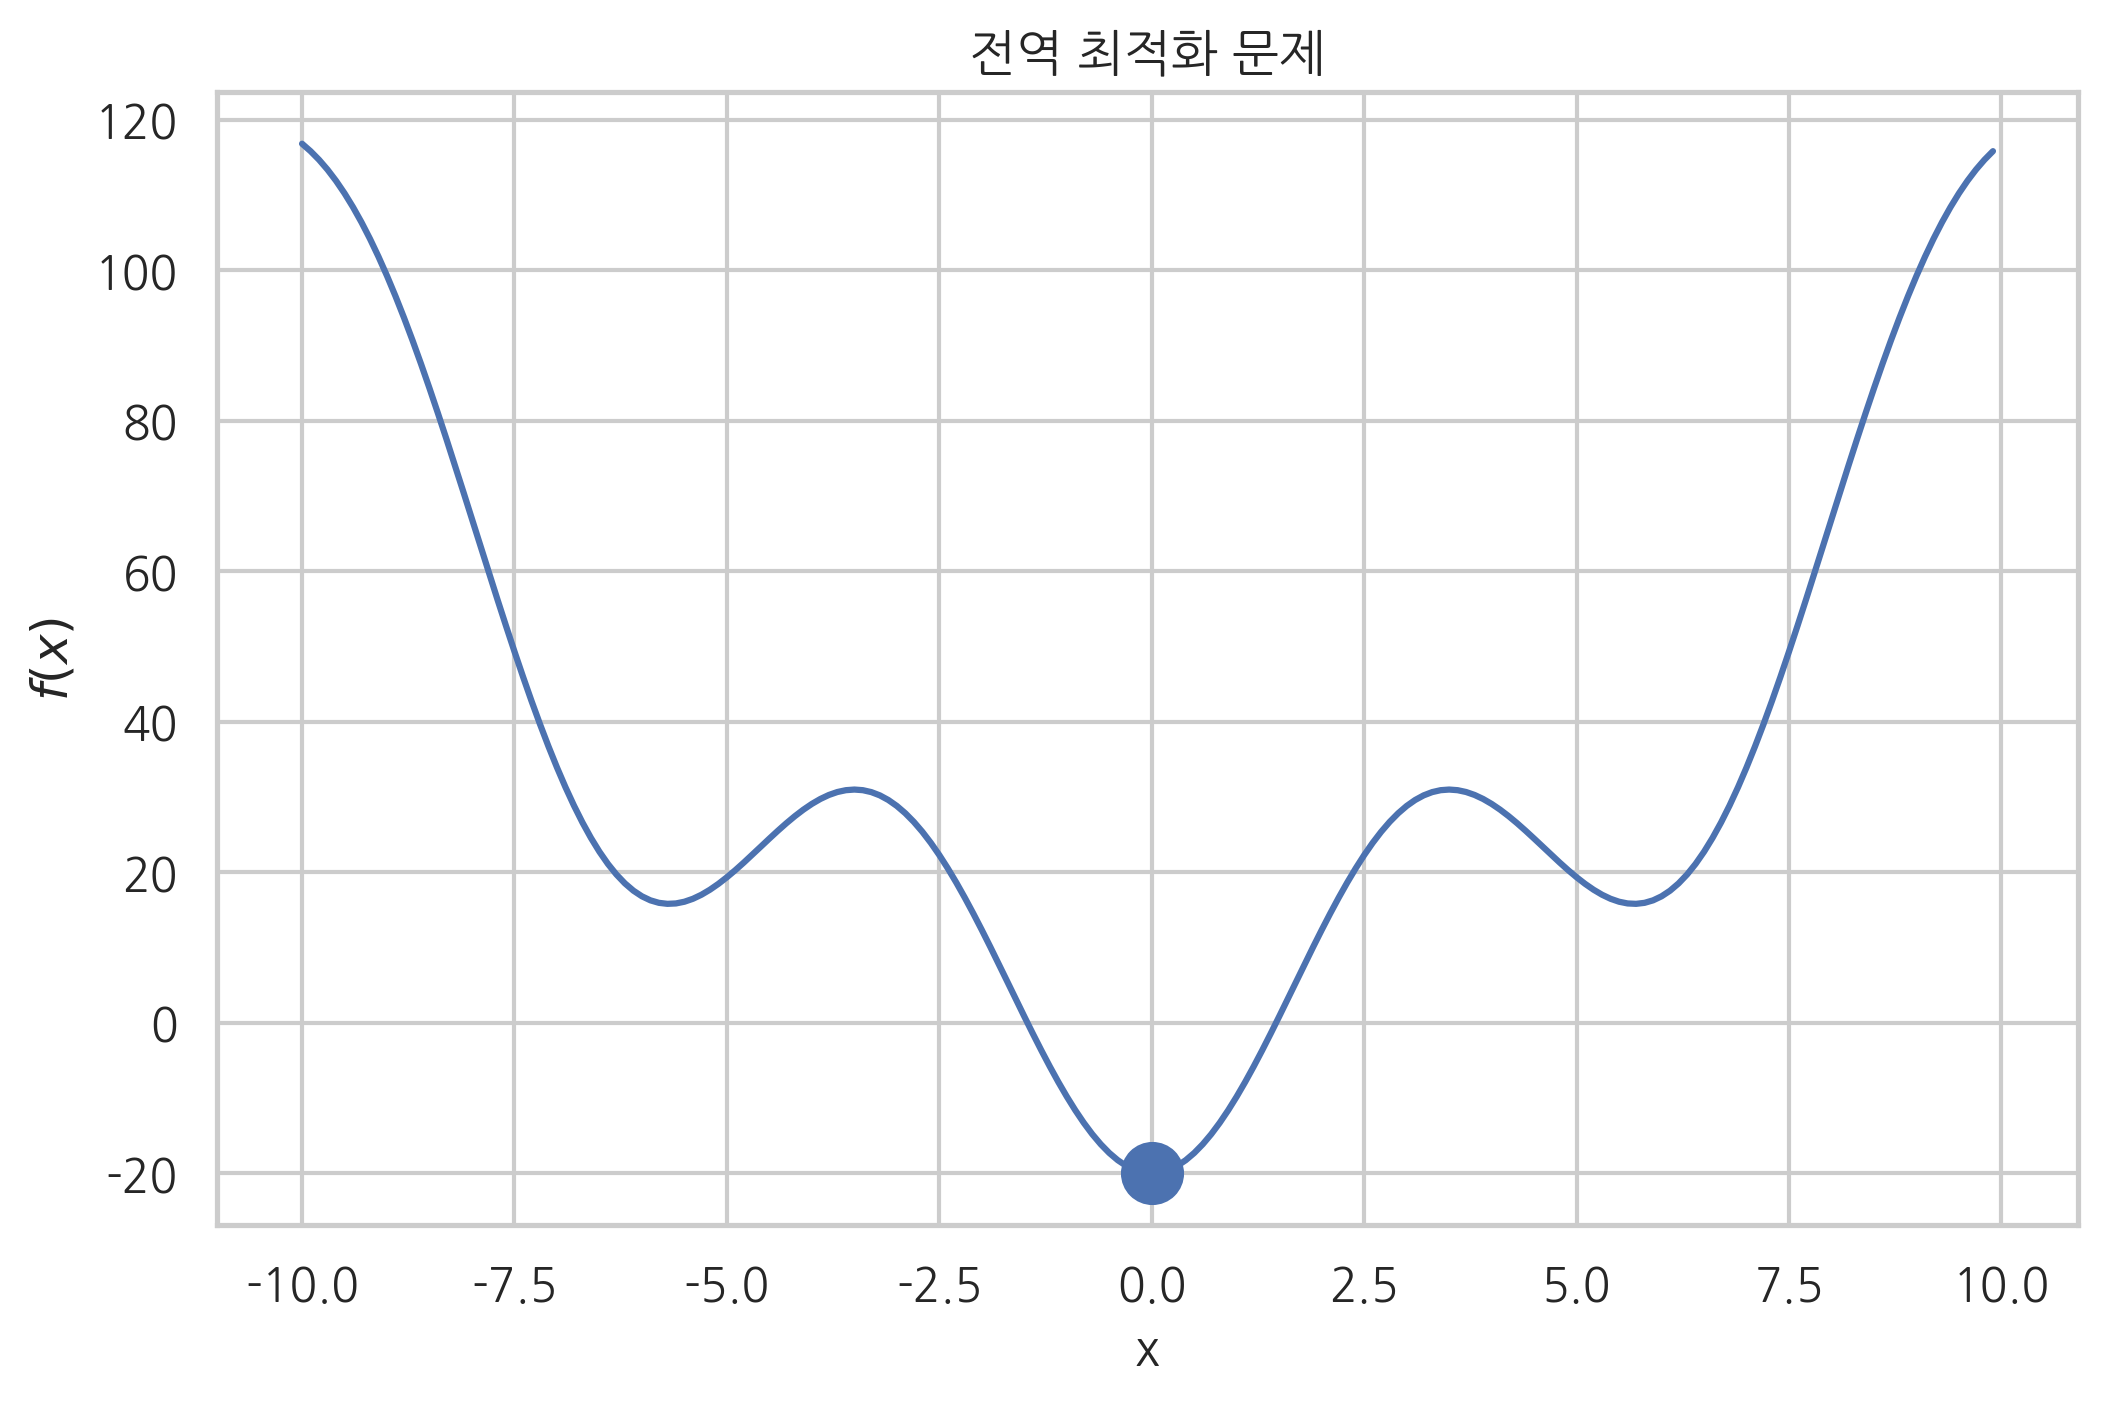

In [31]:
def f_global(x):
    """비선형 목적함수"""
    return x**2 - 20 * np.cos(x)

x = np.arange(-10, 10, 0.1)
plt.plot(x, f_global(x))
plt.scatter(0, f_global(0), s=200)
plt.xlabel("x")
plt.ylabel("$f(x)$")
plt.title("전역 최적화 문제")
plt.show()

In [32]:
result = sp.optimize.minimize(f_global, 4)
print(result)
x_sol = result['x']
x_sol

      fun: 15.791736781359305
 hess_inv: array([[0.05417402]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 6
     njev: 10
   status: 0
  success: True
        x: array([5.6792078])


array([5.6792078])

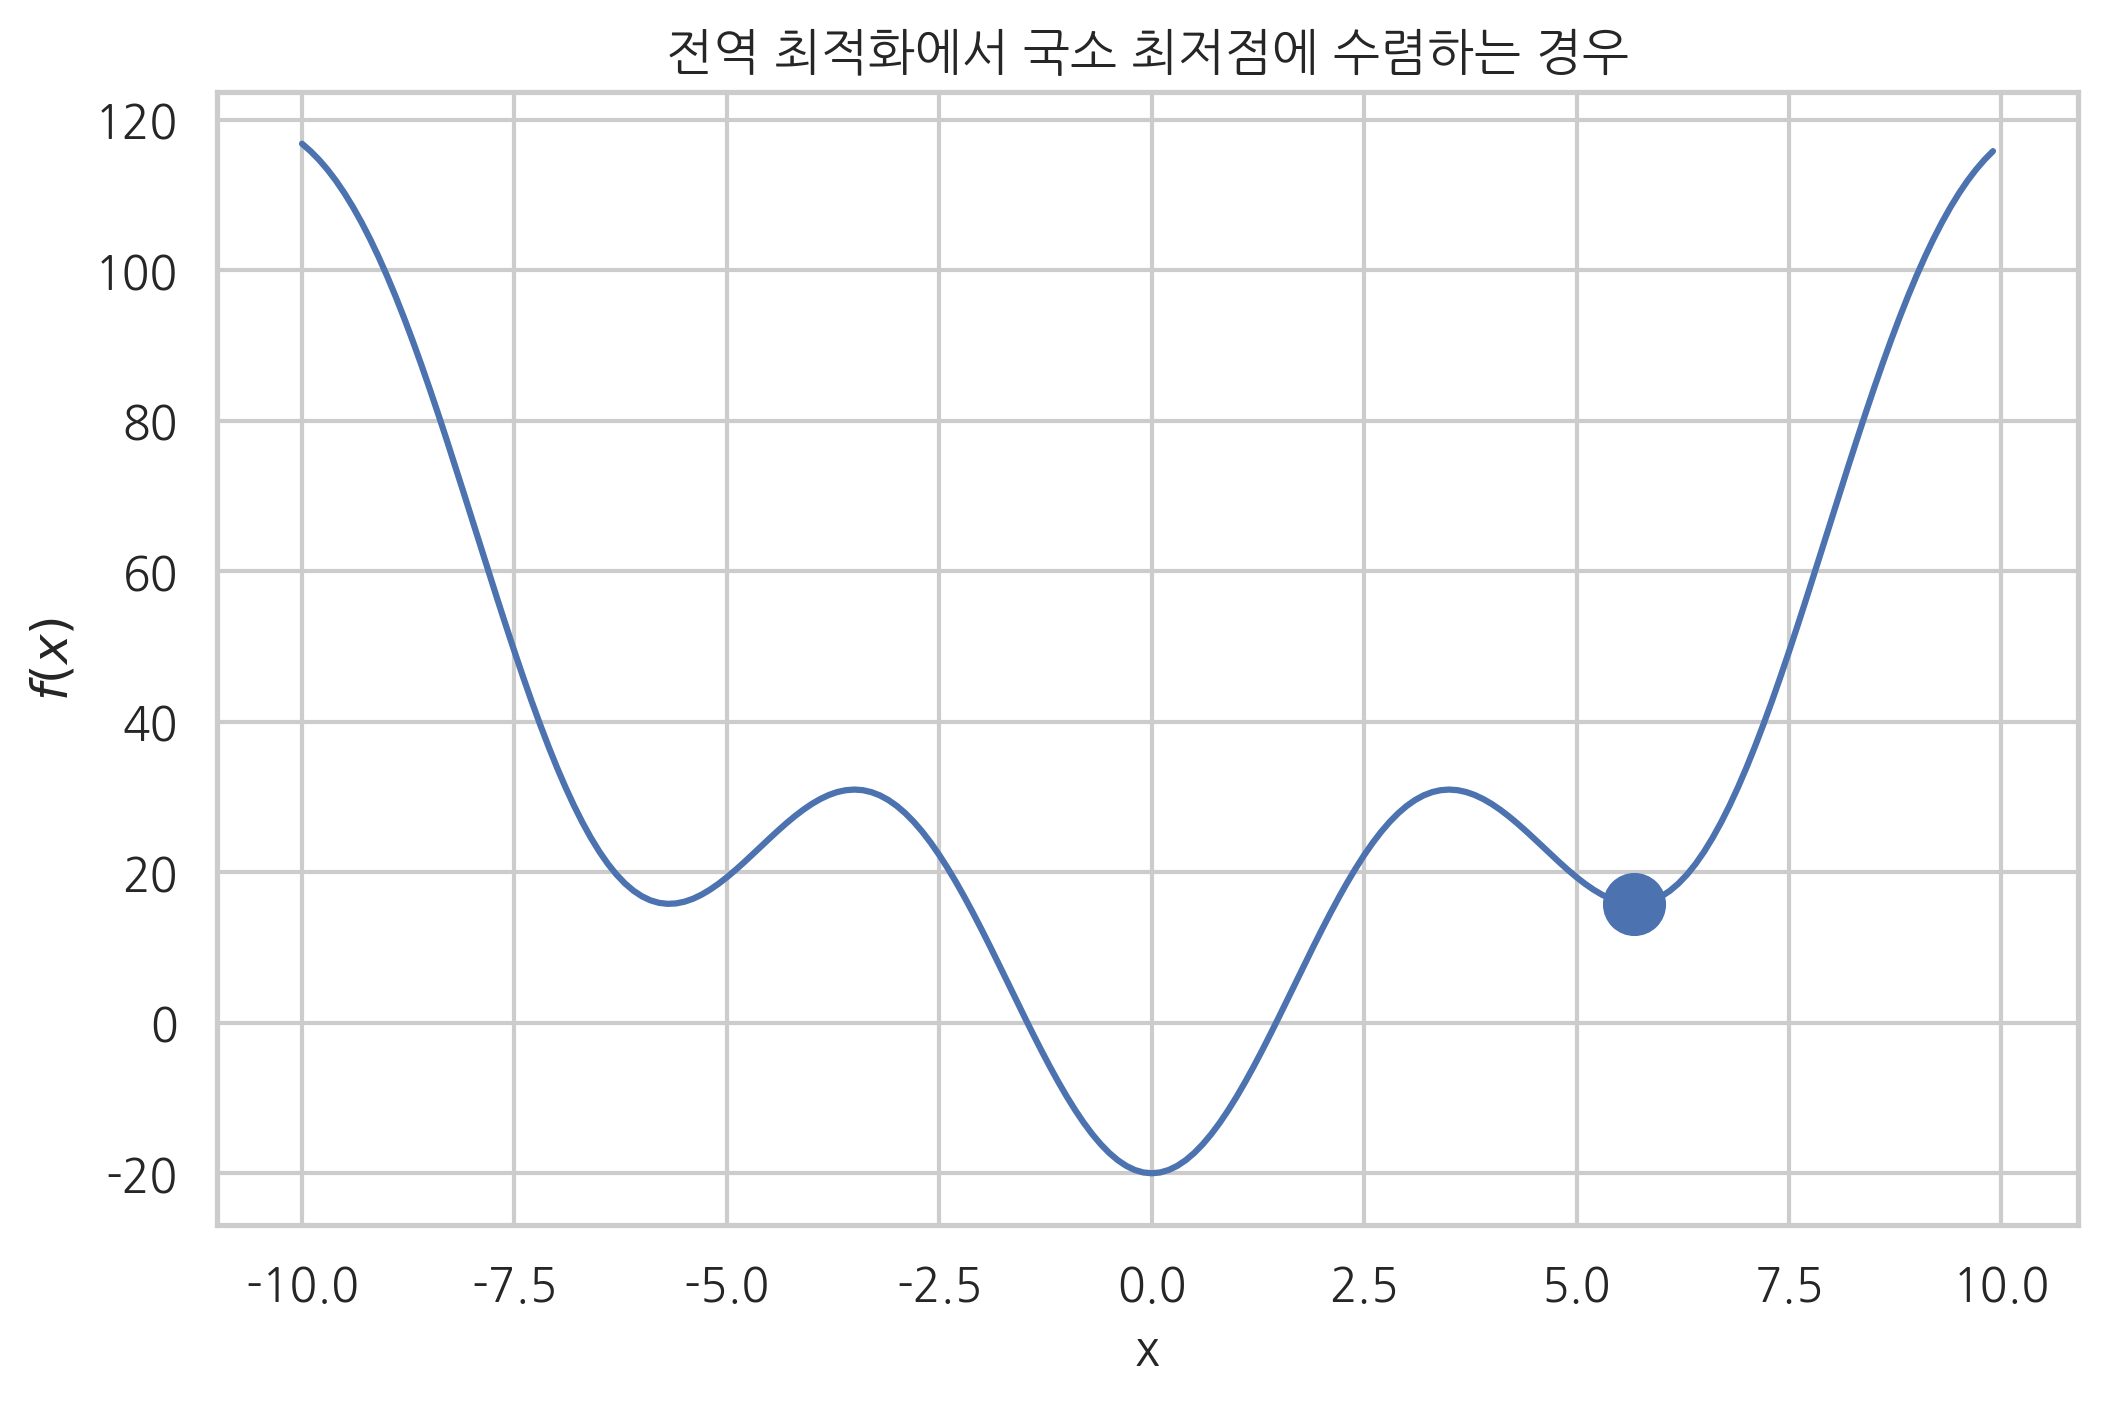

In [33]:
plt.plot(x, f_global(x));
plt.scatter(x_sol, f_global(x_sol), s=200)
plt.title("전역 최적화에서 국소 최저점에 수렴하는 경우")
plt.ylabel("$f(x)$")
plt.xlabel("x")
plt.show()

### 컨벡스 문제

목적함수의 2차 도함수의 값이 항상 0 이상이 되는 영역에서만 정의된 최적화 문제

다변수 목적함수의 경우에는 주어진 영역에서 헤시안 행렬이 항상 양의 준정부호라는 조건

**x.T@H@x >= 0 for all x**

**컨벡스 문제에서는 항상 전역 최적점이 존재**